<a href="https://colab.research.google.com/github/jvataidee/DataAnalysis/blob/master/Analisando_os_Dados_do_Airbnb__Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**by: [João Ataíde](https://www.joaoataide.com)**
# Análise dos Dados do Airbnb - *Toronto, Canadá*


---

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_15cea7ad4387497db65f9b788427f127~mv2.png"></p>



O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Porém, esta **não possui nenhum hotel!** O maior diferencial desta empresa, é o trabalho de conectar as pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, quando ainda era um Startup, já haviam **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais. Uma das iniciativas da empresa foi a abertura de dados para as principais cidades turísticas do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.



##Toronto

A cidade de Toronto é capital da província de Ontário, ela é uma das mais importantes cidades canadenses. Conhecida pelo seu turismo de inverno. Esta é conhecida metrópole dinâmica com um núcleo de arranha-céus altos, que possui muitos espaços verdes, desde o oval organizado do Queen's Park até o High Park de 400 acres e suas trilhas, além de instalações esportivas, museus e zoológico, como mostra o mapa da cidade abaixo.

<p align="center"&gt;<img src="https://areacode416homes.com/assets/uploads/blog/o_20190904113847_fef58828-8f02-4bc4-89e9-7a0cd4b93a46.jpg" height="200px"&gt;</p>

[Fonte](https://areacode416homes.com/torontos-most-and-least-expensive-neighbourhoods-in-2018)

Devido a isso, o presente projeto tem como intuito realizar uma análise exploratória dos dados, retirando assim diversos *insights*, referente aos serviços prestados pelo Airbnb na cidade de Toronto do Canadá. Tal projeto foi inspirado na prática do curso **Data Science na Prática do Calor Melo**.

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#configurações de gráficos
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = "http://data.insideairbnb.com/canada/on/toronto/2020-05-07/visualisations/listings.csv"
data = pd.read_csv(df)

## Análise dos Dados


O *dataset* data de 07 Maio de 2020, este possui diversas variáveis que poderá ser analisada, isto posto é necessário conhecermos o Dicionário e entender o significado de cada nome das colunas.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,470,4,7,2017-12-04,0.12,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,105,180,169,2013-08-27,1.30,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,70,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,217,2019-12-22,1.79,2,0
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,169,4,40,2020-03-20,0.35,5,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Este *dataset*  que estamos usando é a versão "resumida", na mesma página que download o arquivo `listings.csv`. Existe uma versão mais completa dos dados, com arquivo de nome `listings.csv.gz`.

In [ ]:
# identificar o volume de dados do DataFrame
print( "Entradas:\t {}".format(data.shape[0]))
print( "Variáveis:\t {}".format(data.shape[1]))

# verificar as 5 primeiras entradas do dataset
print()
print("Tipos de dados:")
display(data.dtypes)

Entradas:	 21771
Variáveis:	 16

Tipos de dados:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para definir a qualidade de um *dataset*  é necessário conhecer a quantidade de valores ausente. Sendo inportante enteder logo no início da análise. Possibilitando então ver tais valores, das seguintes formas:

* Vendo que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos

In [ ]:
# Dados faltantes em ordem decrescente
(data.isnull().sum() / data.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.193147
last_review                       0.193147
host_name                         0.000092
name                              0.000046
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para indentificar a distribuição destes dados, irei plotar os histogramas referentes a cada camada.

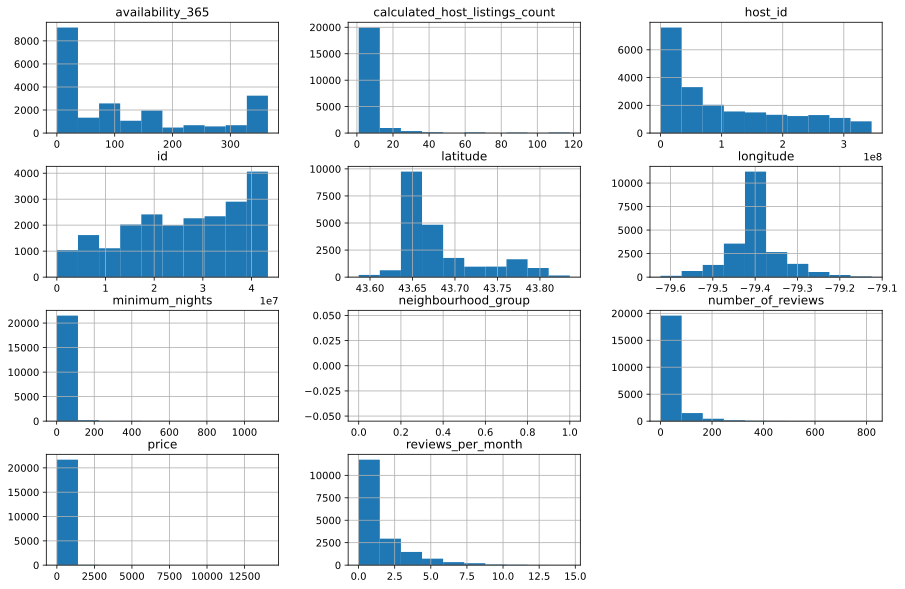

In [ ]:
# plotar o histograma das variáveis numéricas
data.hist(bins=10, figsize=(15,10));

### Q4. **Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar a possível presença de *outliers*. Olhe, por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`. Estas variáveis possuem valores que não seguem uma distruição, no qual distorcem toda a representação gráfica. Dito isto, confirmaremos esta Hipótese, de duas maneiras, sendo elas:

* O Resumo estatístico por meio do método describe()
* O boxplots para a variável.



In [ ]:
#Ver o resumo estatisto das variáveis a seguir
data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21771.000000,21771.000000,21771.000000,17566.000000,21771.000000,21771.000000
mean,144.614855,8.520417,28.167976,1.490266,5.064489,118.803822
std,297.619621,30.923437,53.018686,1.817760,12.230018,131.096867
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,1.000000,1.000000,0.260000,1.000000,0.000000
50%,100.000000,2.000000,7.000000,0.770000,1.000000,83.000000
75%,155.000000,5.000000,30.000000,2.050000,4.000000,201.000000
max,14058.000000,1125.000000,820.000000,14.620000,118.000000,365.000000


Com o resumo estatístico acima, confirmando algumas das hipóteses levantadas, como:

* A variável `price` possui 75% do valor abaixo de 155.00, porém seu valor máximo é 14058.00.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano, chegando ao máximo de 1125.00.

Porém, para ter mais certeza iremos plotar o boxplot.

####Boxplot para o mínimo de noites

preço acima de U$2000.00:
100 Entradas
0.4593%


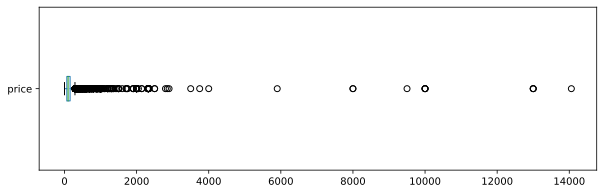

In [ ]:
data.price.plot(kind = "box", vert = False,figsize = (10,3))

# ver quantidade de valores acima de 30 dias para minimum_nights
print("preço acima de U$2000.00:")
print("{} Entradas".format(len(data[data.price > 1000])))
print("{:.4f}%".format((len(data[data.price > 1000]) / data.shape[0])*100))

####Boxplot para o o preço

Minimo de dias acima de 30:
560 Entradas
2.5722%


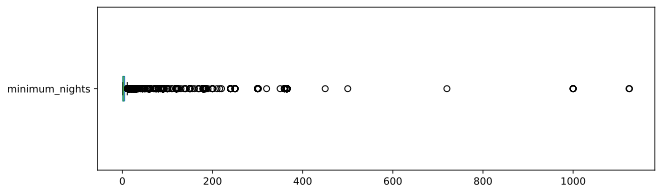

In [ ]:
data.minimum_nights.plot(kind = "box", vert = False,figsize = (10,3))

# ver quantidade de valores acima de 30 dias para minimum_nights
print("Minimo de dias acima de 30:")
print("{} Entradas".format(len(data[data.minimum_nights > 30])))
print("{:.4f}%".format((len(data[data.minimum_nights > 30]) / data.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* das variáveis `price` e `minimum_nights`, vamos efetuar uma limpeza dos dados, retirando os seus outliers, e posteriomente plotar novamente seus histogramas.


In [ ]:
#Remover os outrliers 
data_copy = data.copy()
data_copy.drop(data_copy[ data_copy.price > 100].index, axis =0, inplace = True)
data_copy.drop(data_copy[ data_copy.minimum_nights > 30].index, axis =0, inplace = True)

In [ ]:
#Removendo a camada neighbourhood_group que está vazia
data_copy.drop("neighbourhood_group", axis = 1, inplace = True)

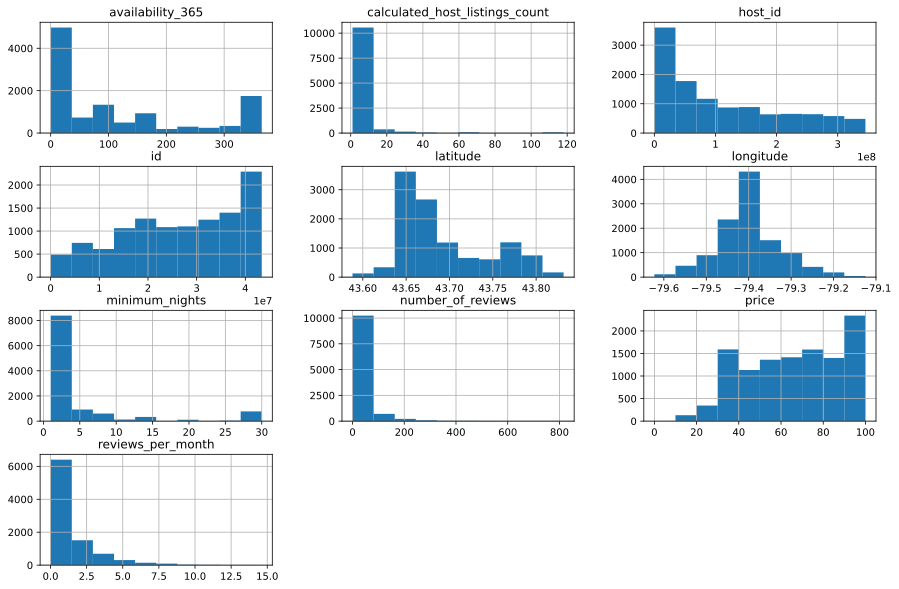

In [ ]:
#Histogramas Limpos
data_copy.hist(bins=10, figsize=(15,10));

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` indica o locação que está anunciada no Airbnb. A empresa, disponibiliza opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas. Então, iremos contar a quantidade de ocorrências de cada aluguel e qual a porcentagem de imoveis disponíveis para cada tipo.


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
data_copy.room_type.value_counts()

Private room       6333
Entire home/apt    4569
Shared room         371
Hotel room           33
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
data_copy.room_type.value_counts() / data_copy.shape[0] *100 

Private room       56.014506
Entire home/apt    40.412171
Shared room         3.281443
Hotel room          0.291880
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara da Cidade de Toronto?**

Iremos comparar os bairros (*neighbourhoods*) a partir do preço de locação, plotando graficamente os pontos.

In [ ]:
# ver preços médio por bairros 
data_bairros = data_copy.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)
data_bairros[:15]

neighbourhood
Waterfront Communities-The Island      84.322398
Niagara                                80.253378
Rosedale-Moore Park                    78.976190
Bay Street Corridor                    78.543779
North Riverdale                        77.846154
Annex                                  76.778075
Danforth East York                     75.745098
Kingsway South                         75.666667
Church-Yonge Corridor                  75.492248
Runnymede-Bloor West Village           73.900000
Moss Park                              73.671053
Forest Hill South                      73.166667
Mimico (includes Humber Bay Shores)    72.007042
Yonge-St.Clair                         71.952381
The Beaches                            71.768421
Name: price, dtype: float64

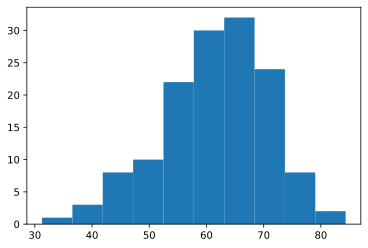

In [ ]:
plt.hist(data_bairros);

Acima, vemos que a maioria dos bairros da cidade de Toronto possuem um preço médio de 60 a 70 dólares para o aluguel no Airbnb.

In [ ]:
# Mapa das localidade mais caras de Toronto
data_copy.plot (kind="scatter", x='longitude', y='latitude', alpha=0.4, c=data_copy['price'], s=8,
              cmap=plt.get_cmap('Blues'), figsize=(12,8));

## Conclusões

O presente trabalho foi somente uma análise superficial da base de dados do Airbnb da cidade de Toronto no Canadá, no qual foram percebidos alguns *outliers* em suas variáveis. Notou-se também uma distribuição desigual dos imóveis, tendo uma concentração destes região do centro da cidade.

Por fim, é importante lembrar que este *dataset* é uma versão resumida, sendo o ideal para uma abordagem inicial de análise. Ficando então como objetivo futuro, uma análise mais apurada do *dataset* completo.
